# Restaurant Food Cost: 


Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places
where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor
that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon,
you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your
Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some 
very interesting insights that might help you choose what to eat and from where.

Size of training set: 12,690 records

Size of test set: 4,231 records
    
FEATURES:
TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.

RESTAURANT_ID: A unique ID for each restaurant.

CUISINES: The variety of cuisines that the restaurant offers.

TIME: The open hours of the restaurant.

CITY: The city in which the restaurant is located.

LOCALITY: The locality of the restaurant.

RATING: The average rating of the restaurant by customers.

VOTES: The overall votes received by the restaurant.

COST: The average cost of a two-person meal.
    
So here we will use different regression methods to predict the Restaurant Food Cost.

# 1-Data Exploration (Reading the data and Attributes name)

In [1]:
#Importing all basic required libray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#lets import the train and test dataset
fc_train=pd.read_excel('foodcost_train.xlsx')
fc_test=pd.read_excel('foocost_test.xlsx')
print(fc_train.shape)
print(fc_test.shape)

(12690, 9)
(4231, 8)


In [4]:
#printing the train data
print(fc_train.head())

               TITLE  RESTAURANT_ID  \
0      CASUAL DINING           9438   
1  CASUAL DINING,BAR          13198   
2      CASUAL DINING          10915   
3        QUICK BITES           6346   
4     DESSERT PARLOR          15387   

                                     CUISINES  \
0                 Malwani, Goan, North Indian   
1              Asian, Modern Indian, Japanese   
2  North Indian, Chinese, Biryani, Hyderabadi   
3                            Tibetan, Chinese   
4                                    Desserts   

                                     TIME     CITY        LOCALITY RATING  \
0  11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)    Thane  Dombivali East    3.6   
1                    6pm – 11pm (Mon-Sun)  Chennai       Ramapuram    4.2   
2     11am – 3:30pm, 7pm – 11pm (Mon-Sun)  Chennai      Saligramam    3.8   
3                 11:30am – 1am (Mon-Sun)   Mumbai     Bandra West    4.1   
4                    11am – 1am (Mon-Sun)   Mumbai     Lower Parel    3.8   

       

In [5]:
#lets print the train data information
print(fc_train.info())

#so there are some missing value, so we will threat them later.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB
None


In [6]:
#printing the test data
print(fc_test.head())

           TITLE  RESTAURANT_ID                                      CUISINES  \
0  CASUAL DINING           4085         North Indian, Chinese, Mughlai, Kebab   
1    QUICK BITES          12680  South Indian, Fast Food, Pizza, North Indian   
2  CASUAL DINING           1411       North Indian, Seafood, Biryani, Chinese   
3           None            204                                       Biryani   
4    QUICK BITES          13453                          South Indian, Kerala   

                                                TIME       CITY      LOCALITY  \
0                      12noon – 12midnight (Mon-Sun)      Noida     Sector 18   
1                            7am – 12:30AM (Mon-Sun)     Mumbai    Grant Road   
2                           11am – 11:30pm (Mon-Sun)     Mumbai  Marine Lines   
3  9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...  Faridabad           NIT   
4                              11am – 10pm (Mon-Sun)      Kochi        Kaloor   

  RATING       VOTES  
0  

In [8]:
#lets print the test data information
print(fc_test.info())

#so there are some missing value, so we will threat them later.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB
None


# 2-Exploratory Data Analysis (Exploring, Imputing, Cleaning & Visualizing)

In [9]:
#so to explore data better we can append both train and test data. 
#So we will combine both train and test for our dayta analysis and for data visualization,
#feature engineering, one-hot encoding, and label encoding as all the attributes are object in nature except price. 
#Later we will split this combined data back to train and test datasets.

fc_train['source']='train'
fc_test['source']='test'
fc_test['COST'] = 0
combidata = pd.concat([fc_train,fc_test],sort=False)
print(fc_train.shape)
print(fc_test.shape)
print(combidata.shape)

(12690, 10)
(4231, 10)
(16921, 10)


In [10]:
#printing the combine data
print(combidata.head())

               TITLE  RESTAURANT_ID  \
0      CASUAL DINING           9438   
1  CASUAL DINING,BAR          13198   
2      CASUAL DINING          10915   
3        QUICK BITES           6346   
4     DESSERT PARLOR          15387   

                                     CUISINES  \
0                 Malwani, Goan, North Indian   
1              Asian, Modern Indian, Japanese   
2  North Indian, Chinese, Biryani, Hyderabadi   
3                            Tibetan, Chinese   
4                                    Desserts   

                                     TIME     CITY        LOCALITY RATING  \
0  11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)    Thane  Dombivali East    3.6   
1                    6pm – 11pm (Mon-Sun)  Chennai       Ramapuram    4.2   
2     11am – 3:30pm, 7pm – 11pm (Mon-Sun)  Chennai      Saligramam    3.8   
3                 11:30am – 1am (Mon-Sun)   Mumbai     Bandra West    4.1   
4                    11am – 1am (Mon-Sun)   Mumbai     Lower Parel    3.8   

       

In [11]:
#lets print the combine data information
print(combidata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          16921 non-null  object
 1   RESTAURANT_ID  16921 non-null  int64 
 2   CUISINES       16921 non-null  object
 3   TIME           16921 non-null  object
 4   CITY           16774 non-null  object
 5   LOCALITY       16793 non-null  object
 6   RATING         16917 non-null  object
 7   VOTES          15315 non-null  object
 8   COST           16921 non-null  int64 
 9   source         16921 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.4+ MB
None


In [15]:
#lets check is there any duplicate data present in the dataset
combidata.duplicated().sum()

26

In [16]:
#so there are 26 duplicate data present in the dataset, so lets drop them first
combidata= combidata.drop_duplicates()
combidata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16895 entries, 0 to 4230
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          16895 non-null  object
 1   RESTAURANT_ID  16895 non-null  int64 
 2   CUISINES       16895 non-null  object
 3   TIME           16895 non-null  object
 4   CITY           16748 non-null  object
 5   LOCALITY       16767 non-null  object
 6   RATING         16891 non-null  object
 7   VOTES          15293 non-null  object
 8   COST           16895 non-null  int64 
 9   source         16895 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.4+ MB


In [18]:
#lets see what are the types of data are present in each attribute which will help us to analyze.
for columns in combidata:
    print("Column Name:",columns)
    #print(np.unique(combidata[columns], return_counts=True))
    print(combidata[columns].value_counts())
    print("\n")

Column Name: TITLE
QUICK BITES                  5627
CASUAL DINING                4902
None                         1284
CAFÉ                          829
DESSERT PARLOR                507
                             ... 
IRANI CAFE,BAKERY               1
CONFECTIONERY,QUICK BITES       1
CAFÉ,FINE DINING                1
BAKERY,CONFECTIONERY            1
QUICK BITES,BAR                 1
Name: TITLE, Length: 123, dtype: int64


Column Name: RESTAURANT_ID
4634     8
7264     8
1619     7
8032     7
4058     7
        ..
986      1
7129     1
11215    1
9166     1
0        1
Name: RESTAURANT_ID, Length: 15574, dtype: int64


Column Name: CUISINES
North Indian                                                            714
North Indian, Chinese                                                   713
South Indian                                                            706
Fast Food                                                               364
Chinese                                  

In [19]:
#lets see how many data are not available for attribute
combidata.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1602
COST                0
source              0
dtype: int64

In [21]:
#lets first see for CITY  attribute as there are 147 null values
# as we don't know about city name, so we will put those values "Missing"
combidata['CITY'].fillna('Missing', inplace=True)
print(combidata['CITY'].isna().sum())

0


In [22]:
#lets see for LOCALITY  attribute as there are 128 null values
# as we don't know about locality name, so we will put those values "Missing"
combidata['LOCALITY'].fillna('Missing', inplace=True)
print(combidata['LOCALITY'].isna().sum())

0


In [25]:
#here Rating attribute has some missing data and also with 'NEW' data and with "-"
#so lets put the rating 1.0 for both "NEW" and "-"
combidata['RATING'] = combidata['RATING'].str.replace('NEW', '1.0')
combidata['RATING'] = combidata['RATING'].str.replace('-', '1.0')
print(combidata['RATING'].value_counts())

3.9    1638
3.8    1601
1.0    1598
4.0    1493
3.7    1437
3.6    1261
4.1    1214
3.5     985
4.2     967
3.4     776
4.3     740
3.3     485
4.4     484
3.2     349
4.5     274
3.1     263
2.9     242
3.0     229
2.8     191
4.6     184
2.7     129
4.7      89
2.6      85
2.5      51
4.8      49
4.9      28
2.4      24
2.3      15
2.1       4
2.2       4
2.0       2
Name: RATING, dtype: int64


In [37]:
#so for model building lets convert this RATING to float datatype
combidata['RATING'] = combidata['RATING'].astype(float)
print(combidata['RATING'].describe())

count    16891.000000
mean         3.520881
std          0.909766
min          1.000000
25%          3.400000
50%          3.800000
75%          4.000000
max          4.900000
Name: RATING, dtype: float64


In [38]:
# as we don't know about missing RATING so we will fill these missing value with the average value wrt std dev.
for dataset in combidata:
    mean = combidata['RATING'].mean()
    std = combidata['RATING'].std()
    is_null = combidata['RATING'].isnull().sum()
    # calculate random numbers between the mean, std and is_null
    missval = np.random.randint(mean - std, mean + std, size = is_null)
    # filling these random values in VOTES column
    fillval = combidata["RATING"].copy()
    fillval[np.isnan(fillval)] = missval
    combidata["RATING"] = fillval
    combidata["RATING"] = combidata["RATING"].astype(float)

#again check for VOTES attribute after missing value replacement
print(combidata['RATING'].describe())

print(combidata['RATING'].isna().sum())

count    16895.000000
mean         3.520698
std          0.909760
min          1.000000
25%          3.400000
50%          3.800000
75%          4.000000
max          4.900000
Name: RATING, dtype: float64
0


In [31]:
#lets see for VOTE  attribute as there are 1602 null values
#first we will separate the " votes" word from VOTE attribute, which will help us for analysis
combidata['VOTES'] = combidata['VOTES'].str.replace(' votes', '')
print(combidata['VOTES'].isna().sum())

#so for model building lets convert this RATING to float datatype
combidata['VOTES'] = combidata['VOTES'].astype(float)

print(combidata['VOTES'].describe())

1602
count    15293.000000
mean       419.134506
std        840.378264
min          3.000000
25%         57.000000
50%        164.000000
75%        462.000000
max      41186.000000
Name: VOTES, dtype: float64


In [33]:
# as we don't know about missing VOTES so we will fill these missing value with the average value wrt std dev.
for dataset in combidata:
    mean = combidata['VOTES'].mean()
    std = combidata['VOTES'].std()
    is_null = combidata['VOTES'].isnull().sum()
    # calculate random numbers between the mean, std and is_null
    missval = np.random.randint(mean - std, mean + std, size = is_null)
    # filling these random values in VOTES column
    fillval = combidata["VOTES"].copy()
    fillval[np.isnan(fillval)] = missval
    combidata["VOTES"] = fillval
    combidata["VOTES"] = combidata["VOTES"].astype(float)

#again check for VOTES attribute after missing value replacement
print(combidata['VOTES'].describe())

print(combidata['VOTES'].isna().sum())

count    16895.000000
mean       417.975851
std        813.790570
min       -421.000000
25%         56.000000
50%        174.000000
75%        503.000000
max      41186.000000
Name: VOTES, dtype: float64
0


In [42]:
#lets again see is there any missing data after treating all the missing values and thier information
print(combidata.isna().sum())
print(combidata.info())

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
source           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16895 entries, 0 to 4230
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          16895 non-null  object 
 1   RESTAURANT_ID  16895 non-null  int64  
 2   CUISINES       16895 non-null  object 
 3   TIME           16895 non-null  object 
 4   CITY           16895 non-null  object 
 5   LOCALITY       16895 non-null  object 
 6   RATING         16895 non-null  float64
 7   VOTES          16895 non-null  float64
 8   COST           16895 non-null  int64  
 9   source         16895 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.4+ MB
None


In [43]:
#lets see tha data
combidata.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200,train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500,train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800,train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800,train
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300,train


In [45]:
#lets analysis the TIME attribute, so here we will find the closed time of resturants
import re
def extract_closed(time):
    a = re.findall('Closed \(.*?\)', time)
    if a != []:
        return a[0]
    else:
        return 'NA'

combidata['CLOSED'] = combidata['TIME'].apply(extract_closed)

In [52]:
combidata['TIME'] = combidata['TIME'].str.replace(r'Closed \(.*?\)','')

In [57]:
print(combidata['TIME'].describe())
print(combidata['TIME'].value_counts())
print(combidata['TIME'].head())

count                     16895
unique                     3295
top       11am – 11pm (Mon-Sun)
freq                       1861
Name: TIME, dtype: object
11am – 11pm (Mon-Sun)                               1861
12noon – 12midnight (Mon-Sun)                        614
12noon – 11pm (Mon-Sun)                              539
11am – 12midnight (Mon-Sun)                          418
10am – 10pm (Mon-Sun)                                288
                                                    ... 
12noon – 9:30pm (Mon),11am – 9:30pm (Tue-Sun)          1
11:30am – 4:30pm (Mon-Sun)                             1
11am – 11:29am (Mon),11am – 12midnight (Tue-Sun)       1
12noon – 4pm, 6:30pm – 10pm (Mon-Sat),                 1
11am – 11pm (Mon-Thu),11am – 11:55pm (Fri-Sun)         1
Name: TIME, Length: 3295, dtype: int64
0    11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)
1                      6pm – 11pm (Mon-Sun)
2       11am – 3:30pm, 7pm – 11pm (Mon-Sun)
3                   11:30am – 1am (Mon-Sun)
4   

In [61]:
#so lets drop the TIME attribute
combidata=combidata.drop(columns=['TIME'])

In [62]:
#lets see the data
combidata.head()

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES,COST,source,CLOSED
0,CASUAL DINING,9438,"Malwani, Goan, North Indian",Thane,Dombivali East,3.6,49.0,1200,train,NA
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",Chennai,Ramapuram,4.2,30.0,1500,train,NA
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,221.0,800,train,NA
3,QUICK BITES,6346,"Tibetan, Chinese",Mumbai,Bandra West,4.1,24.0,800,train,NA
4,DESSERT PARLOR,15387,Desserts,Mumbai,Lower Parel,3.8,165.0,300,train,NA


In [63]:
#lets combine both CITY and LOCALITY for better analysis and the new attribute name is "LOCATION"

combidata['LOCATION']=combidata['CITY']+' '+combidata['LOCALITY']

#dropping the CITY and LOCALITY attribute from dataset
combidata=combidata.drop(columns=['CITY','LOCALITY'])

In [64]:
#lets see the data
combidata.head()

,TITLE,RESTAURANT_ID,CUISINES,RATING,VOTES,COST,source,CLOSED,LOCATION
0,CASUAL DINING,9438,"Malwani, Goan, North Indian",3.6,49.0,1200,train,NA,Thane Dombivali East
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",4.2,30.0,1500,train,NA,Chennai Ramapuram
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi",3.8,221.0,800,train,NA,Chennai Saligramam
3,QUICK BITES,6346,"Tibetan, Chinese",4.1,24.0,800,train,NA,Mumbai Bandra West
4,DESSERT PARLOR,15387,Desserts,3.8,165.0,300,train,NA,Mumbai Lower Parel


In [66]:
#so here by looking the data we can drop RESTAURANT_ID attribute which is not require for our analysis
combidata=combidata.drop(columns=['RESTAURANT_ID'])

KeyError: "['RESTAURANT_ID'] not found in axis"

In [67]:
#lets see the data
combidata.head()

,TITLE,CUISINES,RATING,VOTES,COST,source,CLOSED,LOCATION
0,CASUAL DINING,"Malwani, Goan, North Indian",3.6,49.0,1200,train,NA,Thane Dombivali East
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",4.2,30.0,1500,train,NA,Chennai Ramapuram
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi",3.8,221.0,800,train,NA,Chennai Saligramam
3,QUICK BITES,"Tibetan, Chinese",4.1,24.0,800,train,NA,Mumbai Bandra West
4,DESSERT PARLOR,Desserts,3.8,165.0,300,train,NA,Mumbai Lower Parel


In [68]:
#lets print the combine data information
print(combidata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16895 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     16895 non-null  object 
 1   CUISINES  16895 non-null  object 
 2   RATING    16895 non-null  float64
 3   VOTES     16895 non-null  float64
 4   COST      16895 non-null  int64  
 5   source    16895 non-null  object 
 6   CLOSED    16895 non-null  object 
 7   LOCATION  16895 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.2+ MB
None


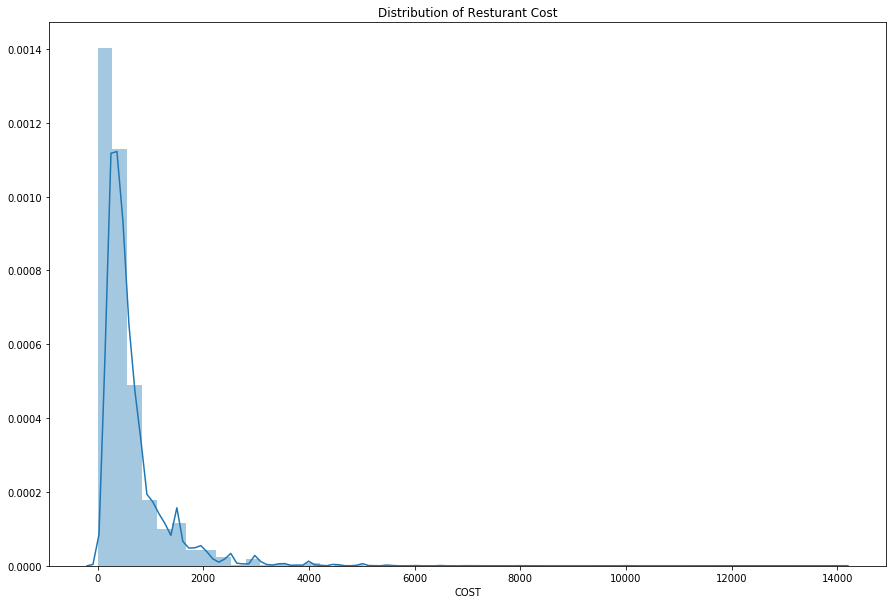

In [69]:
# now lets see the distribution of "COST" in the dataset
plt.figure(figsize=(15,10))
plt.title('Distribution of Resturant Cost')
sns.distplot(combidata['COST'])

#so by looking this the data is skewed, so we will treat them later.

   RATING    COST
0     4.0  869560
1     4.1  831200
2     3.9  817750
3     4.2  754800
4     3.8  661729
5     4.3  609810
6     3.7  568130
7     1.0  481040
8     3.6  457520
9     4.4  428270


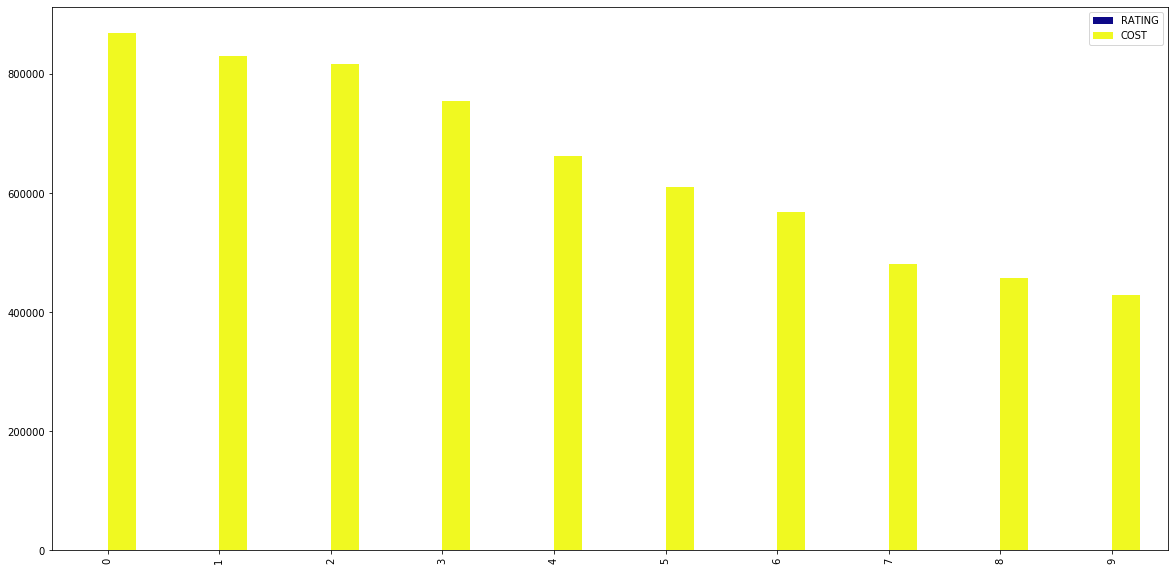

In [70]:
#lets see the Cost of top Rating
top_cases=combidata[['COST','RATING']].groupby('RATING').sum().sort_values('COST',ascending=False).head(10)
top_cases=top_cases.reset_index()
print(top_cases)
top_cases.plot(kind='bar',width=0.5,colormap='plasma',figsize=(20,10))
plt.show()

In [1]:
#lets see the COST of top VOTES
top_cases=combidata[['COST','VOTES']].groupby('VOTES').sum().sort_values('COST',ascending=False).head(10)
top_cases=top_cases.reset_index()
print(top_cases)
top_cases.plot(kind='bar',width=0.5,colormap='plasma',figsize=(20,10))
plt.show()

NameError: name 'combidata' is not defined

                    LOCATION    COST
0      Bangalore Indiranagar  110810
1       Hyderabad Gachibowli  110750
2    Hyderabad Jubilee Hills  107150
3  New Delhi Connaught Place   94250
4    Hyderabad Banjara Hills   94200
5         Mumbai Lower Parel   91000
6       Bangalore Whitefield   86150
7       Chennai Nungambakkam   86000
8     Bangalore Marathahalli   77200
9              Mumbai Colaba   76550


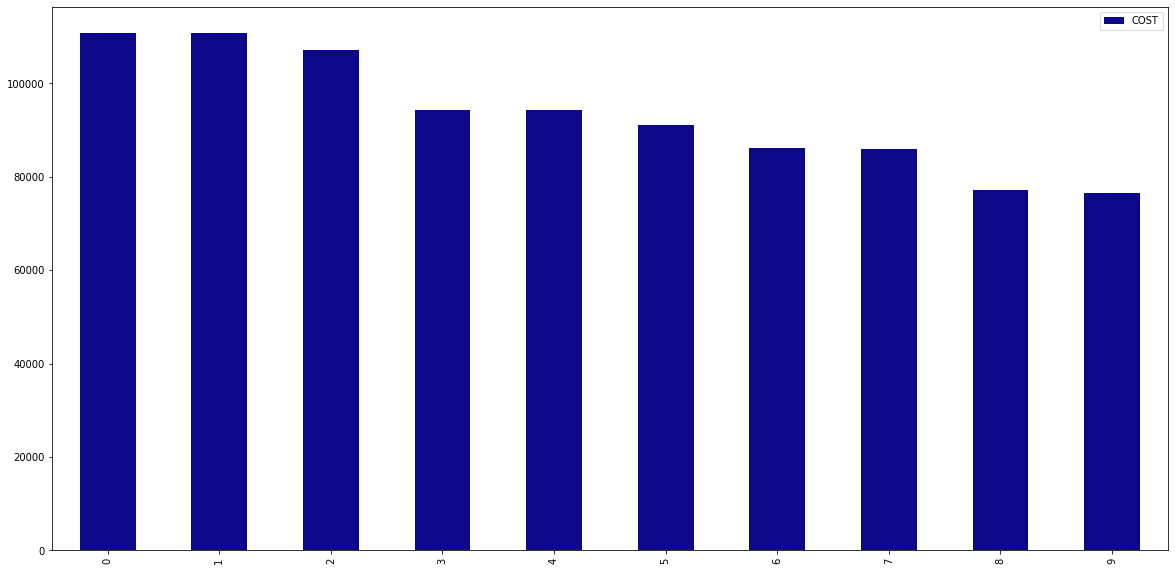

In [72]:
#lets see the COST of top LOCATION
top_cases=combidata[['COST','LOCATION']].groupby('LOCATION').sum().sort_values('COST',ascending=False).head(10)
top_cases=top_cases.reset_index()
print(top_cases)
top_cases.plot(kind='bar',width=0.5,colormap='plasma',figsize=(20,10))
plt.show()

In [73]:
#lets print all the columns name and create a array for all categorical data to convert them to numerical value.
print(combidata.columns)

Index(['TITLE', 'CUISINES', 'RATING', 'VOTES', 'COST', 'source', 'CLOSED',
       'LOCATION'],
      dtype='object')


In [74]:
#Now convert all the categorical variable to numerical varibale using label encoder.
cat_data=['TITLE','CUISINES','CLOSED','LOCATION']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_data:
    combidata[i] = le.fit_transform(combidata[i])

In [75]:
#lets again see what are the types of data are present in each attribute after label encoder.
for columns in combidata:
    print("Column Name:",columns)
    print(np.unique(combidata[columns], return_counts=True))
    print(combidata[columns].value_counts())
    print("\n")

Column Name: TITLE
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122]), array([ 391,    2,   18,    1,    1,   61,    1,  126,    2,  124,    4,
        175,    1,    6,   17,    1,    8,  215,    4,    1,   25,    1,
         44,    1,  829,   43,   23,    4,   47,   38,    1,    1,    2,
         35, 4902,    9,  463,   65,    2,    1,    2,    4,   17,   10,
 

In [76]:
#again checking the information of the data
combidata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16895 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     16895 non-null  int32  
 1   CUISINES  16895 non-null  int32  
 2   RATING    16895 non-null  float64
 3   VOTES     16895 non-null  float64
 4   COST      16895 non-null  int64  
 5   source    16895 non-null  object 
 6   CLOSED    16895 non-null  int32  
 7   LOCATION  16895 non-null  int32  
dtypes: float64(2), int32(4), int64(1), object(1)
memory usage: 923.9+ KB


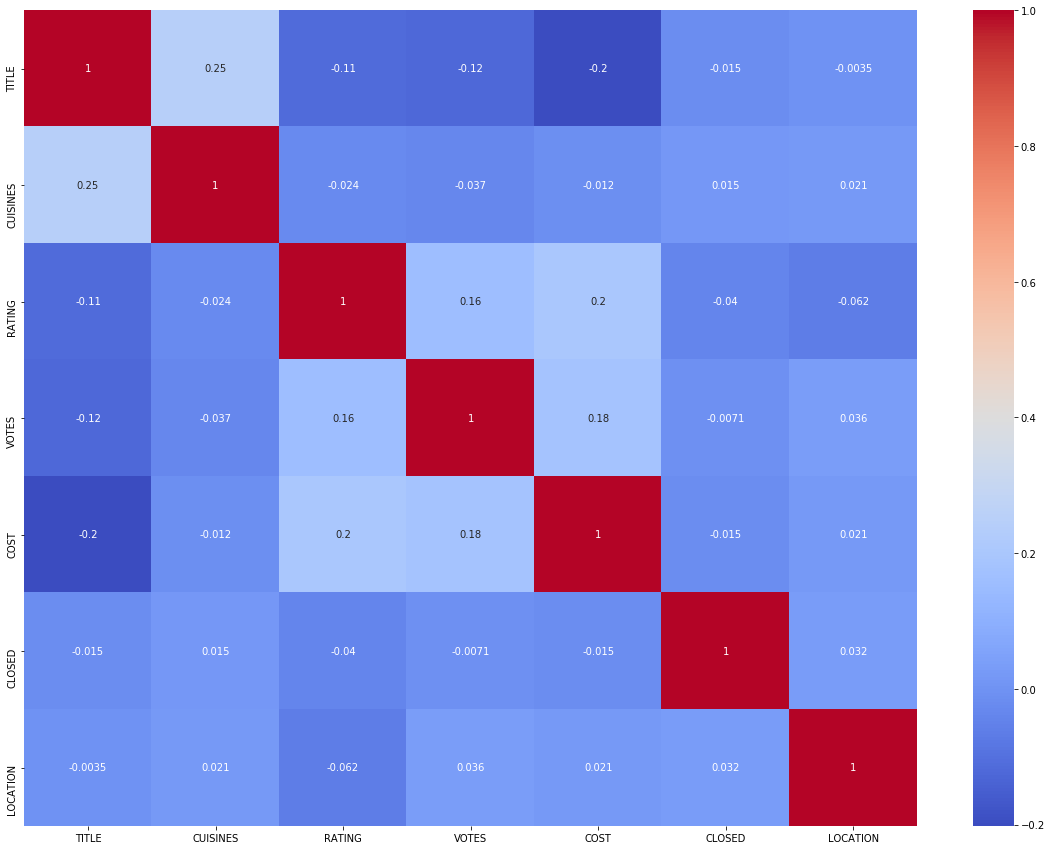

In [78]:
#lets see the corelation among data
plt.figure(figsize=(20,15))
sns.heatmap(combidata.corr(),cmap='coolwarm',annot=True)

#so by looking the corelation of data, we can say that ratig and votes attributes has most significant.

TITLE          AxesSubplot(0.125,0.125;0.0945122x0.755)
CUISINES    AxesSubplot(0.238415,0.125;0.0945122x0.755)
RATING      AxesSubplot(0.351829,0.125;0.0945122x0.755)
VOTES       AxesSubplot(0.465244,0.125;0.0945122x0.755)
COST        AxesSubplot(0.578659,0.125;0.0945122x0.755)
CLOSED      AxesSubplot(0.692073,0.125;0.0945122x0.755)
LOCATION    AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

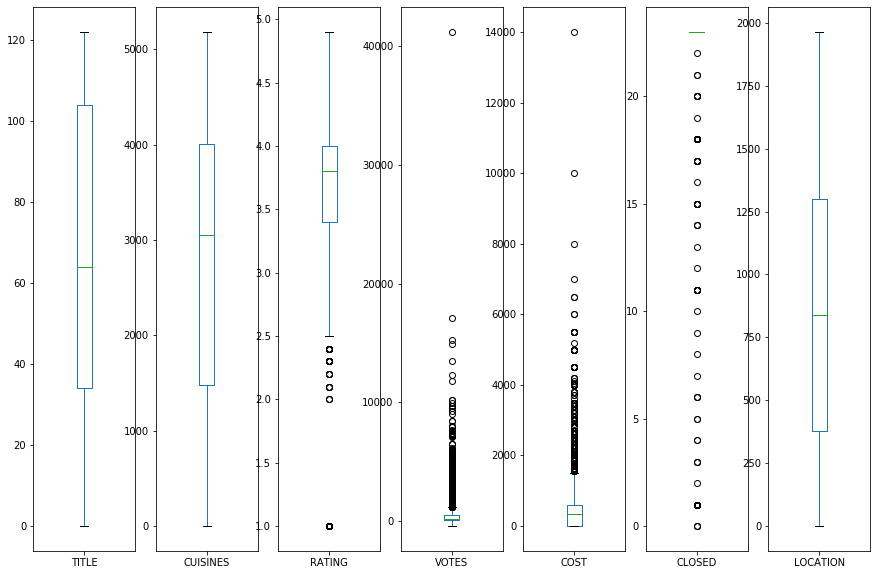

In [79]:
#checking the outliers with box plot
combidata.plot(kind='box',subplots=True, figsize=(15,10))

#so here we saw that there are no outlier data present.

In [81]:
# Now our data is ready for model building, so split them into original train and test dataset
rfcost_train = combidata.loc[combidata['source']=="train"]
rfcost_test = combidata.loc[combidata['source']=="test"]
print(rfcost_train.shape)
print(rfcost_test.shape)

(12665, 8)
(4230, 8)


In [82]:
#Drop the columns which are added initially for data analysis
rfcost_train.drop(['source'],axis=1,inplace=True)
rfcost_test.drop(['COST','source'],axis=1,inplace=True)
print(rfcost_train.shape)
print(rfcost_test.shape)

(12665, 7)
(4230, 6)


In [87]:
#scaling the train and test dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
foodcost_train=sc.fit_transform(rfcost_train)
foodcost_train=pd.DataFrame(foodcost_train,columns=rfcost_train.columns)


In [88]:
foodcost_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12665 entries, 0 to 12664
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     12665 non-null  float64
 1   CUISINES  12665 non-null  float64
 2   RATING    12665 non-null  float64
 3   VOTES     12665 non-null  float64
 4   COST      12665 non-null  float64
 5   CLOSED    12665 non-null  float64
 6   LOCATION  12665 non-null  float64
dtypes: float64(7)
memory usage: 692.7 KB


In [89]:
#scaling the train and test dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
foodcost_test=sc.fit_transform(rfcost_test)
foodcost_test=pd.DataFrame(foodcost_test,columns=rfcost_test.columns)

In [90]:
foodcost_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4230 entries, 0 to 4229
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     4230 non-null   float64
 1   CUISINES  4230 non-null   float64
 2   RATING    4230 non-null   float64
 3   VOTES     4230 non-null   float64
 4   CLOSED    4230 non-null   float64
 5   LOCATION  4230 non-null   float64
dtypes: float64(6)
memory usage: 198.4 KB


In [91]:
#Now Export the final dataset:
foodcost_train.to_csv("foodcost_train.csv",index=False)
foodcost_test.to_csv("foodcost_test.csv",index=False)

# 3-Preparing the Train data for Model Building

In [92]:
#lets import the final train and test dataset and print them
rfoodcost_train=pd.read_csv('foodcost_train.csv')
rfoodcost_test=pd.read_csv('foodcost_test.csv')

print(rfoodcost_train.shape)
print(rfoodcost_test.shape)

(12665, 7)
(4230, 6)


In [93]:
#printing the train data
print(rfoodcost_train.head())

      TITLE  CUISINES    RATING     VOTES      COST    CLOSED  LOCATION
0 -0.867041  0.327044  0.086199 -0.448382  0.868074  0.151219  1.916987
1 -0.811245 -1.612535  0.746441 -0.471660  1.346264  0.151219 -0.769500
2 -0.867041  0.615002  0.306280 -0.237647  0.230487  0.151219 -0.760094
3  1.085810  1.559637  0.636401 -0.479011  0.230487  0.151219  0.726128
4 -0.281186 -0.385238  0.306280 -0.306259 -0.566498  0.151219  0.846531


In [94]:
# separating the input and output/target variables of dtrain
import numpy as np
x=rfoodcost_train.drop(columns=['COST'],axis=1)
y=rfoodcost_train[['COST']]

print(x.shape)
print(y.shape)

(12665, 6)
(12665, 1)


# 4-Building Different Model and Finding the Best Model

In [95]:
#defining the models which will be used for model building
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
from sklearn.linear_model import Lasso
lsreg=Lasso(alpha=0.1)
from sklearn.linear_model import Ridge
lrreg=Ridge(alpha=0.1)
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [96]:
#appending all the models
models=[]
models.append(('LinearRegression',lreg))
models.append(('KNeighborsRegressor',knn))
models.append(('Lasso',lsreg))
models.append(('Ridge',lrreg))
models.append(('GradientBoostingRegressor',gbr))
models.append(('AdaBoostRegressor',ada))
models.append(('RandomForestRegressor',rf))

In [97]:
#printing the output of each model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
Model=[]
RState=[]
score=[]
for name, model in models:
    print('************************',name,'**********************')
    print('\n')
    Model.append(name)
    max_r2_score=0.0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=r_state)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r2_score:
            max_r2_score=r2_scr
            final_r_state=r_state
    print('Final Random State is:', final_r_state)
    print('\n')
    RState.append(final_r_state*1)
    print('R2 Score is:', max_r2_score)
    print('\n')
    score.append(max_r2_score*100)
    print('\n')

************************ LinearRegression **********************


Final Random State is: 59


R2 Score is: 0.20057732245325122




************************ KNeighborsRegressor **********************


Final Random State is: 91


R2 Score is: 0.5270548854004493




************************ Lasso **********************


Final Random State is: 59


R2 Score is: 0.15594547982957085




************************ Ridge **********************


Final Random State is: 59


R2 Score is: 0.2005770969746965




************************ GradientBoostingRegressor **********************


Final Random State is: 86


R2 Score is: 0.7589944166659133




************************ AdaBoostRegressor **********************


Final Random State is: 57


R2 Score is: 0.19562691067383453




************************ RandomForestRegressor **********************


Final Random State is: 86


R2 Score is: 0.7770874789982781






In [98]:
#lets print the final result of all the models
result=pd.DataFrame({'Model':Model,'Random_State':RState,'R2_Score':score})
print(result)

                       Model  Random_State   R2_Score
0           LinearRegression            59  20.057732
1        KNeighborsRegressor            91  52.705489
2                      Lasso            59  15.594548
3                      Ridge            59  20.057710
4  GradientBoostingRegressor            86  75.899442
5          AdaBoostRegressor            57  19.562691
6      RandomForestRegressor            86  77.708748


In [99]:
# So here RandomForestRegressor is the best model, so lets find out the best parameter for this to get maximum score
#lets use grid search method to find optimal value 

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rfreg=RandomForestRegressor()
parameters={'bootstrap': [True, False],
            'max_depth': [5, 10,None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 5,],
            'min_samples_split': [2, 5],
            'n_estimators':[int(x) for x in np.linspace(start = 200, stop = 1000, num = 200)]}
clf=GridSearchCV(rfreg, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

#its taking long time to get the best parameter, so i stopped in middle

KeyboardInterrupt: 

In [100]:
#the best parameter values are bootstrap=, max_depth= ,max_features= ,min_samples_leaf= ,min_samples_split= ,n_estimators= and random_state=86
#this is taking long time (aapx more than 5 hrs) to find all the best parameters, so stopped the execution.
#hence building the final model with random_state=86.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=86)
rfreg=RandomForestRegressor()
rfreg.fit(x_train,y_train)
y_pred=rfreg.predict(x_test)
print('R2 score is:',r2_score(y_test,y_pred))
print('RMSE is:',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score is: 0.7793784525717182
RMSE is: 0.46591949345236433


In [101]:
#checking the mean r2 score and overfitting and underfitting using cross validation
from sklearn.model_selection import cross_val_score
print('Mean R2 score of RandomForestRegressor is:', cross_val_score(rfreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation of RandomForestRegressor is:',cross_val_score(rfreg,x,y,cv=5,scoring='r2').std())

Mean R2 score of RandomForestRegressor is: 0.7118659877260992
Standard Deviation of RandomForestRegressor is: 0.039693720526224205


In [102]:
#lets predict the Avarage Price value
print('Actual Cost:\n',y_test)
print('Predicted Cost:\n',y_pred)

#So by looking this we can conclude that our model is predicting around 86% of correct results 
#for predicting the claim amount auto insurance.

Actual Cost:
           COST
9094 -0.168006
7907 -0.247704
4274 -0.725894
1531 -0.566498
2995 -0.486799
...        ...
1503  1.346264
9725 -0.327402
5490 -0.088307
6325 -0.486799
3137 -0.247704

[2533 rows x 1 columns]
Predicted Cost:
 [-0.49158107 -0.65018091 -0.61830155 ... -0.29313202 -0.58164028
 -0.4652806 ]


In [103]:
#saving the final model
from sklearn.externals import joblib
#save the model as joblib in a file
joblib.dump(rfreg,'rfreg_rfcost.obj')

['rfreg_rfcost.obj']

In [104]:
# load the model from the file
rfcost_from_joblib=joblib.load('rfreg_rfcost.obj')

In [105]:
#Use the loaded model to make predictions against test data
rfcost_from_joblib.predict(x_test)

array([-0.49158107, -0.65018091, -0.61830155, ..., -0.29313202,
       -0.58164028, -0.4652806 ])

In [106]:
#lets predict the resturant food cost for test dataset which provided initially
rfcost_test_predict=rfcost_from_joblib.predict(rfoodcost_test)
print(rfcost_test_predict)

[ 0.459221   -0.52824234  0.06630782 ... -0.46687456 -0.51947552
 -0.51389663]


# Conclusion:
    
So here 'RandomForestRegressor Model' is the best model out of all model tested above and by looking this we can
conclude that our model is predicting around 80% of correct results for predicting the resturant food cost.